# Assignment 1
Assignments are an individual assessment, you should not work in groups.

You will be turning in:

1. A README.md with all the relevant information. Please see example on Canvas under the Course Docs module.
2. An .ipynb with just your code (show all code necessary for the analysis, but remove superfluous code)
3. A PDF with your Report (see [Google Docs Template](https://docs.google.com/document/d/1W24e0UDCbctlL_yJgpV2fLVtcaLscwf4ptLfgeB8cnk/edit))

All three of these files should be compressed into a singular zip file before submission.

## Data
We're going to be using some [clothing store data](https://github.com/katherinehansen2/CPSC392Hansen/blob/main/data/boutique.csv) to help the company predict how much their customers will spend with them per year.

- `gender`: self-disclosed gender identity, `male`, `female`, `nonbinary` or `other`
- `age`: current age of customer
- `height_cm`: self-reported height converted to centimeters
- `waist_size_cm`: self-reported waist size converted to centimeters
- `inseam_cm`: self-reported inseam (measurement from crotch of pants to floor) converted to centimeters
- `test_group`: whether or not the customer is in an experimental test group that gets special coupons once a month. `0` for no, `1` for yes.
- `salary_self_report_in_k`: self-reported salary of customer, in thousands
- `months_active`: number of months customer has been part of the clothing store's preferred rewards program
- `num_purchases`: the number of purchases the customer has made (a purchase is a single transaction that could include multiple items)
- `amount_spent_annual`: the average amount the customer has spent at the store per year
- `year`: the year the data was collected


## 1. Modeling
- Drop Missing Values and Reset Indices if needed.
- Using *Train-Test-Split Model Validation* with an 80/20 split and `sklearn` build **two** models (a Linear And Polynomial Regression) that predict the average amount the customer spends in a year using all the other variables.
- Z-score continuous/interval variables, and One Hot Encode categorical variables (when needed) before fitting your models.
- Try both a typical **Linear Regression** model and a **Polynomial Regression** model (using `PolynomialFeatures()`)
- Once the model is trained, calculate the *MSE, MAE, and $R^2$* for both the training and testing sets of both models.

## 2. Graphs
Choose 2 of the following bullet points to answer. Build at *least* one ggplot to answer each question (you can also do other calculations in addition), and write a detailed written answer based on the graph and calculations in your report (below). You do not NEED to use your model from part 1 for these questions, they can be purely descriptive. Be sure to clearly indicate which questions you are answering

1. Does being in the experimental `test_group` actually increase the amount a customer spends at the store? Is this relationship different for the different genders?
2. Does making more money (salary) tend to increase the number of purchases someone makes? Does it increase the total amount spent?
3. In which year did the store's *customers* make the most money? Were the store's sales highest in those years?
4. People who are not your "average" size often find it difficult to buy clothes in traditional stores. Is there a relationship between inseam and amount spent in the store annually? Is there a relationship between height and amount spent in the store annually?
5. In this dataset, is there a relationship between salary and height? Is it different for the different genders?
6. The store is interested in whether their customer base has changed over time. Present the minimum, maximum, and average height, waist size, and inseam for each year.


For all ggplots, make sure you make changes so that the data viz is effective, clear, and does not contain distracting elements. Graphs will be graded both on correctness (did you plot the right thing?) as well as on effectiveness (does this graph thoughtfully demonstrate the principles we learned in our data viz lectures?). You should be aiming to make graphs that fall into the "good" category.

## 3. Report

[TEMPLATE HERE](https://docs.google.com/document/d/1W24e0UDCbctlL_yJgpV2fLVtcaLscwf4ptLfgeB8cnk/edit)

Your Technical Report is a way to practice presenting and formatting your results like you would in industry. Make sure your report is clear, and explains things clearly. Your technical report will be scored on the quality of the content and the quality of the writing. Write a report that has the following sections:

1. **Introduction**: description of the problem (e.g. what are you predicting? what variables do you have available? How might this model be useful if you are successful?). You should end with a sentence or two about what the impact of these models could have.

2. **Methods**: describe your models in detail (as if explaining them to the store's CEO), as well as any pre-processing you had to do to the data.

3. **Results**: How well did your model perform according to the various metrics. Was the model overfit? How can you tell? What do those performance metrics tell you about the model? Did you need `PolynomialFeatures` (which includes both ploynomial features and interactions)?  How much do you trust the results of your model (in other words, would you be confident telling the store that they should use the model? Why or why not? Are there any caveats you'd give them?) Also answer the two questions you chose from part 2 above. Include the image, a caption as well as your written answer.

4. **Discussion/Reflection**: A few sentences about what you learned from performing these analyses, and at least one suggestion for what you'd add or do differently if you were to perform this analysis again in the future.

**PART 1** MODELING

In [2]:
import warnings
warnings.filterwarnings('ignore')

# data imports
import pandas as pd
import numpy as np
from plotnine import *

# modeling imports
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, LogisticRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures #Z-score variables and polynomial regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error, accuracy_score, f1_score #model evaluation
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut

%matplotlib inline

In [3]:
#load in boutique dataset

boutique = pd.read_csv("https://raw.githubusercontent.com/katherinehansen2/CPSC392Hansen/refs/heads/main/data/boutique.csv")
boutique.head()

#check for null values

boutique.isnull().sum()

#drop missing values and reset index

boutique.dropna(inplace = True)
boutique.reset_index(inplace = True)
boutique.isnull().sum()

#one hot encode categorical variables

pd.get_dummies(boutique, ["gender"], drop_first=True)

#list of predictors, x and y values

predictors = ["year","gender","age","height_cm","waist_size_cm","inseam_cm","test_group","salary_self_report_in_k","months_active","num_purchases"]
X = boutique[predictors]
Y = boutique["amount_spent_annual"]


In [4]:
#train test split -> 80% train, 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

#continuous variables
contin = ["age","height_cm","waist_size_cm","inseam_cm","salary_self_report_in_k","months_active"]

#z score continuous variables

scaler = StandardScaler()

X_train[contin] = scaler.fit_transform(X_train[contin]) # z-score X Train
X_test[contin] = scaler.transform(X_test[contin]) # z-score X test using same mu and sd as train
X_train[contin]

,age,height_cm,waist_size_cm,inseam_cm,salary_self_report_in_k,months_active
17346,-0.541430,-1.001577,0.570527,-0.489391,1.599678,-1.304219
14436,-0.182919,-0.336455,0.145154,0.985481,1.620417,0.425187
14154,-0.780437,0.162386,-0.563800,-0.981014,-0.813832,-0.007165
21804,-0.421927,-0.170175,1.279482,-0.489391,0.598153,0.136952
23437,-1.138948,-0.336455,2.130227,0.985481,-0.386088,-0.439516
...,...,...,...,...,...,...
10955,0.295095,1.326350,0.570527,-1.472638,-1.066157,-0.439516
17289,-0.302423,-0.502736,-0.138427,-0.981014,-1.118869,0.425187
5192,1.729137,-0.336455,-1.414546,-0.981014,-1.056652,0.569304
12172,-1.377955,1.160069,0.712318,0.985481,-1.512911,1.289889


In [5]:
#LINEAR REGRESSION
#fit linear regression model

lr = LinearRegression()
lr.fit(X_train[contin], Y_train)

#predict for both train and test sets

Y_train_pred = lr.predict(X_train[contin])
Y_test_pred = lr.predict(X_test[contin])

#assess mse, mae, r^2
#train
print("Train MSE : ", mean_squared_error(Y_train,Y_train_pred))
print("Train MAE : ", mean_absolute_error(Y_train,Y_train_pred))
print("Train R2  : ", r2_score(Y_train,Y_train_pred))
#test
print("Test MSE : ", mean_squared_error(Y_test,Y_test_pred))
print("Test MAE : ", mean_absolute_error(Y_test,Y_test_pred))
print("Test R2  : ", r2_score(Y_test,Y_test_pred))

Train MSE :  19321.169092703483
Train MAE :  110.41923767775656
Train R2  :  0.2863640452148456
Test MSE :  19899.74546347162
Test MAE :  112.00428344705955
Test R2  :  0.2748757565434625


In [6]:
#POLYNOMIAL REGRESSION
#transform to polynomial features
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_train[contin])

#fit the model
pn = LinearRegression()
pn.fit(X_poly, Y_train)

#predict
X_test_poly = poly_features.transform(X_test[contin])
Y_train_poly_pred = pn.predict(X_poly)
Y_test_poly_pred = pn.predict(X_test_poly)

#assess mse, mae, r2

#train
print("Train MSE : ", mean_squared_error(Y_train,Y_train_poly_pred))
print("Train MAE : ", mean_absolute_error(Y_train,Y_train_poly_pred))
print("Train R2  : ", r2_score(Y_train,Y_train_poly_pred))
#test
print("Test MSE : ", mean_squared_error(Y_test,Y_test_poly_pred))
print("Test MAE : ", mean_absolute_error(Y_test,Y_test_poly_pred))
print("Test R2  : ", r2_score(Y_test,Y_test_poly_pred))

Train MSE :  9736.676500265015
Train MAE :  80.1616634396498
Train R2  :  0.6403715325215578
Test MSE :  9958.863242250442
Test MAE :  80.60596733646962
Test R2  :  0.6371102742253791


**PART 2** GRAPHING

[2] Does making more money (salary) tend to increase the number of
purchases someone makes? Does it increase the total amount spent?



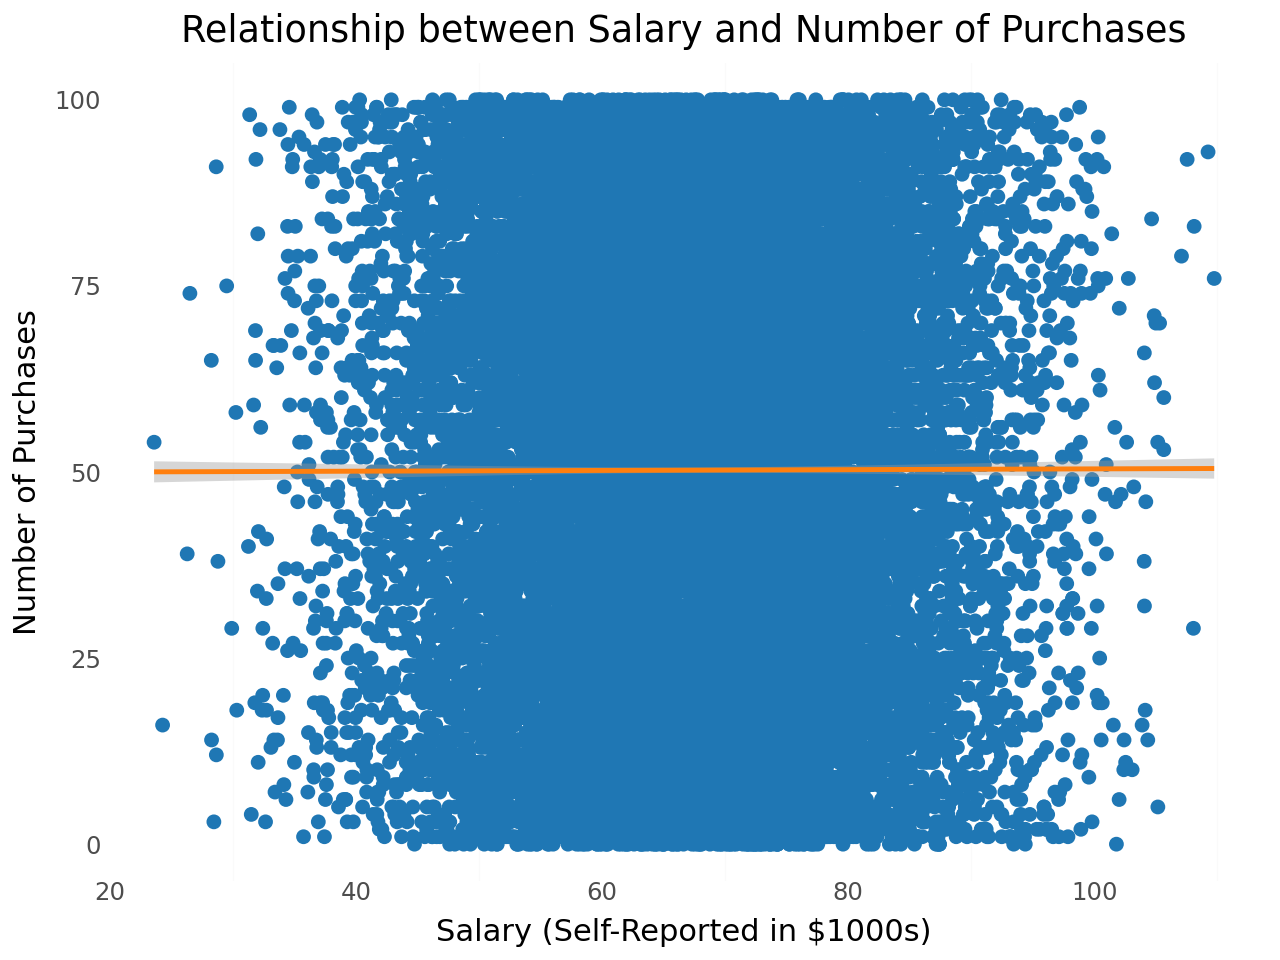

In [7]:
#build ggplot for salary & num_purchases

(ggplot(boutique, aes(x = "salary_self_report_in_k", y = "num_purchases"))
+ geom_point(size = 2, color = "#1f77b4")
+ theme_minimal()
+ labs(
    title = "Relationship between Salary and Number of Purchases",
    x = "Salary (Self-Reported in $1000s)",
    y = "Number of Purchases")
+ geom_smooth(method = "lm", color = "#ff7f0e") #linear regression line
+ theme(panel_grid_major_x = element_blank(),
        panel_grid_major_y = element_blank(),
        panel_grid_minor_y = element_blank()))

[6] The store is interested in whether their customer base has changed over time. Present the minimum, maximum, and average height, waist size, and inseam for each year.

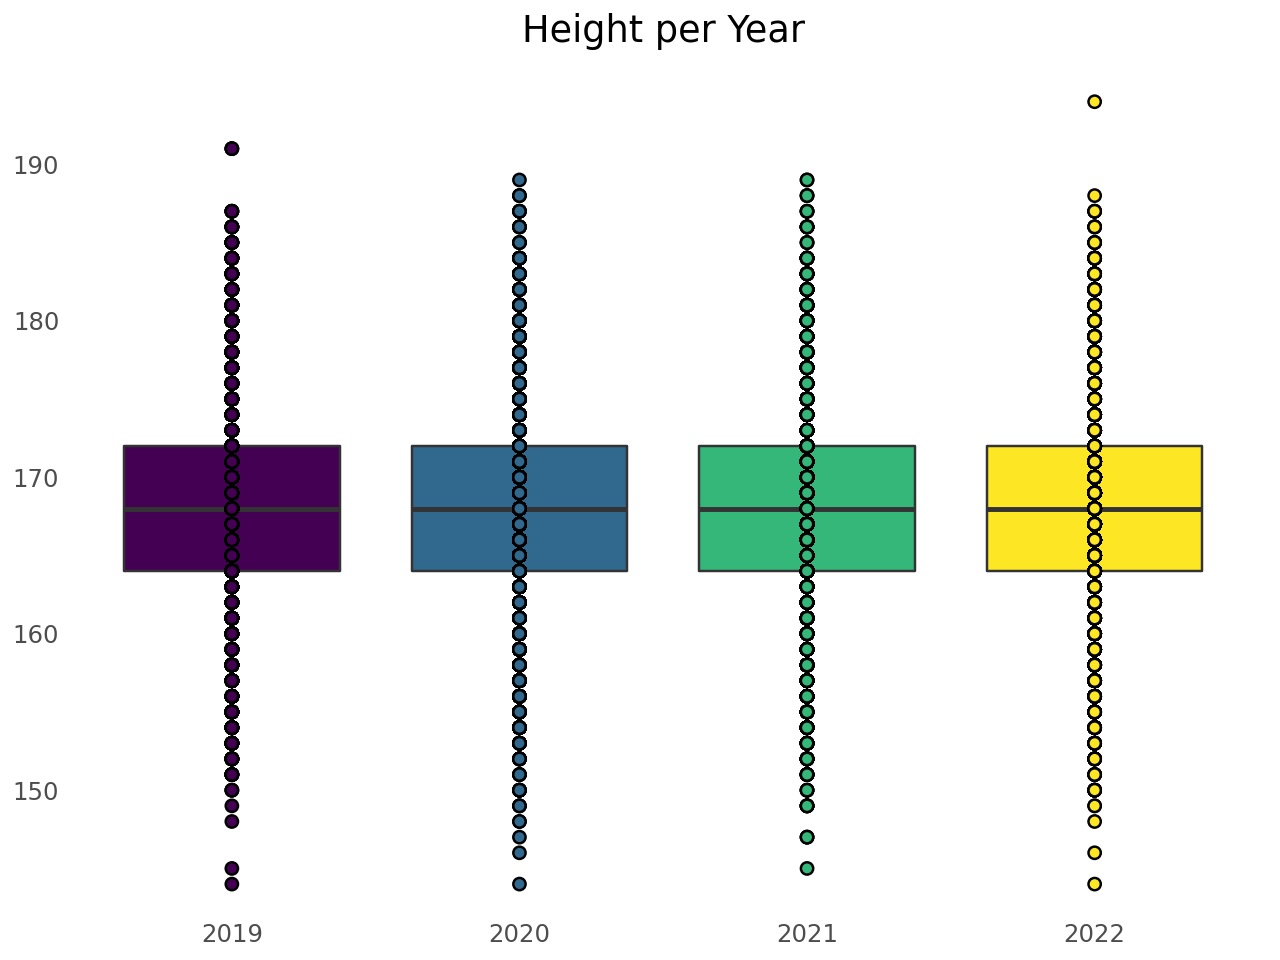

In [8]:
#build boxplot for height per year, waist size per year, inseam per year

#height per year
(ggplot(boutique, aes(x = "factor(year)", y = "height_cm", fill = "year")) + geom_boxplot() + geom_point(size = 2)
+ theme_minimal()
+ labs(title = "Height per Year", x = "Year", y = "Height (cm)")
+ theme(panel_grid_major_x = element_blank(),
        panel_grid_major_y = element_blank(),
        panel_grid_minor_y = element_blank(),
        axis_title_x=element_blank(),
        axis_title_y=element_blank(),
        legend_position = "none"))

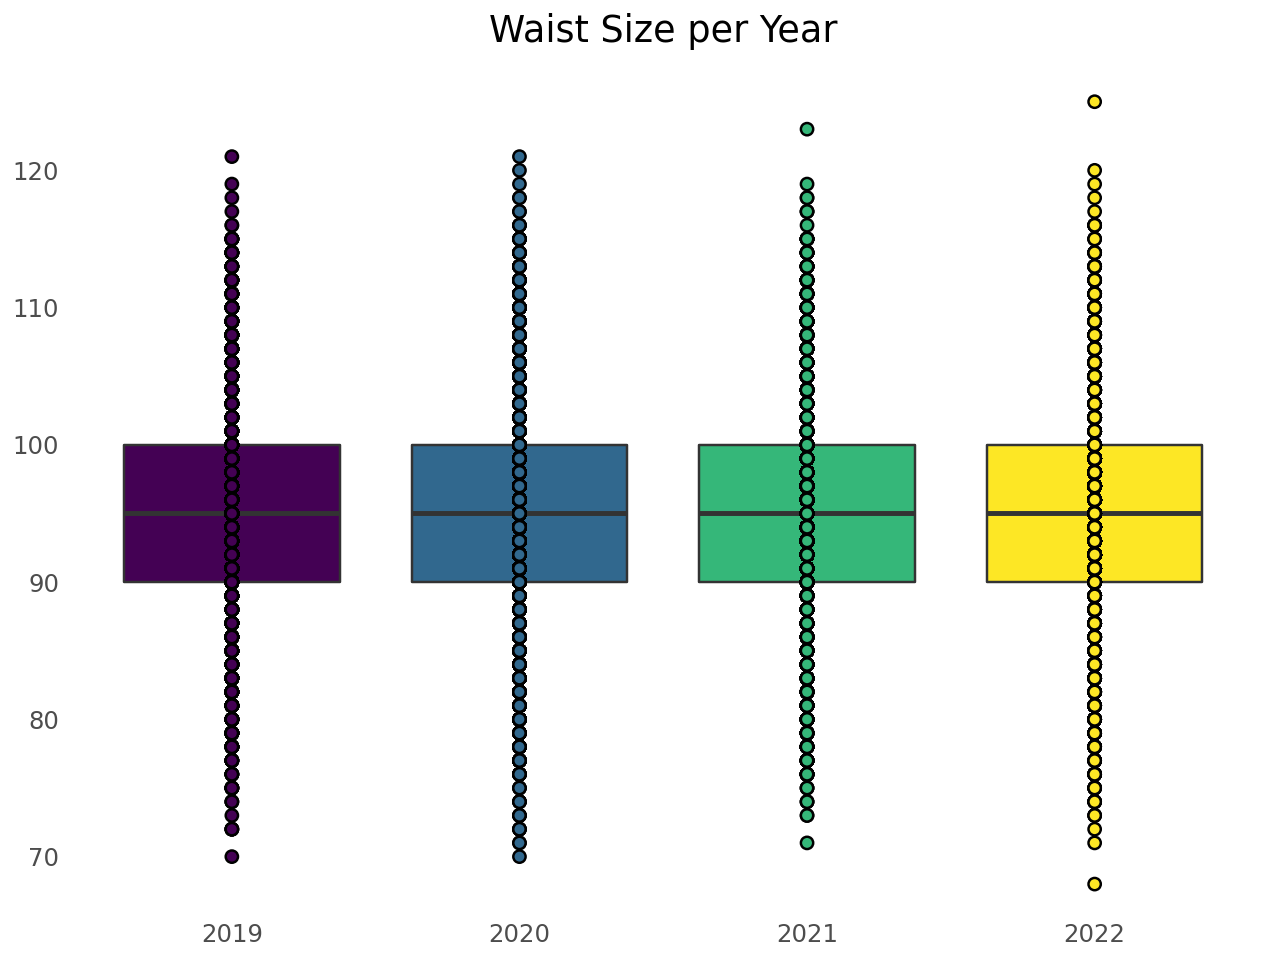

In [9]:
#waist size per year
(ggplot(boutique, aes(x = "factor(year)", y = "waist_size_cm", fill = "year")) + geom_boxplot() + geom_point(size = 2)
+ theme_minimal()
+ labs(title = "Waist Size per Year", x = "Year", y = "Waist Size (cm)")
+ theme(panel_grid_major_x = element_blank(),
        panel_grid_major_y = element_blank(),
        panel_grid_minor_y = element_blank(),
        axis_title_x=element_blank(),
        axis_title_y=element_blank(),
        legend_position = "none"))

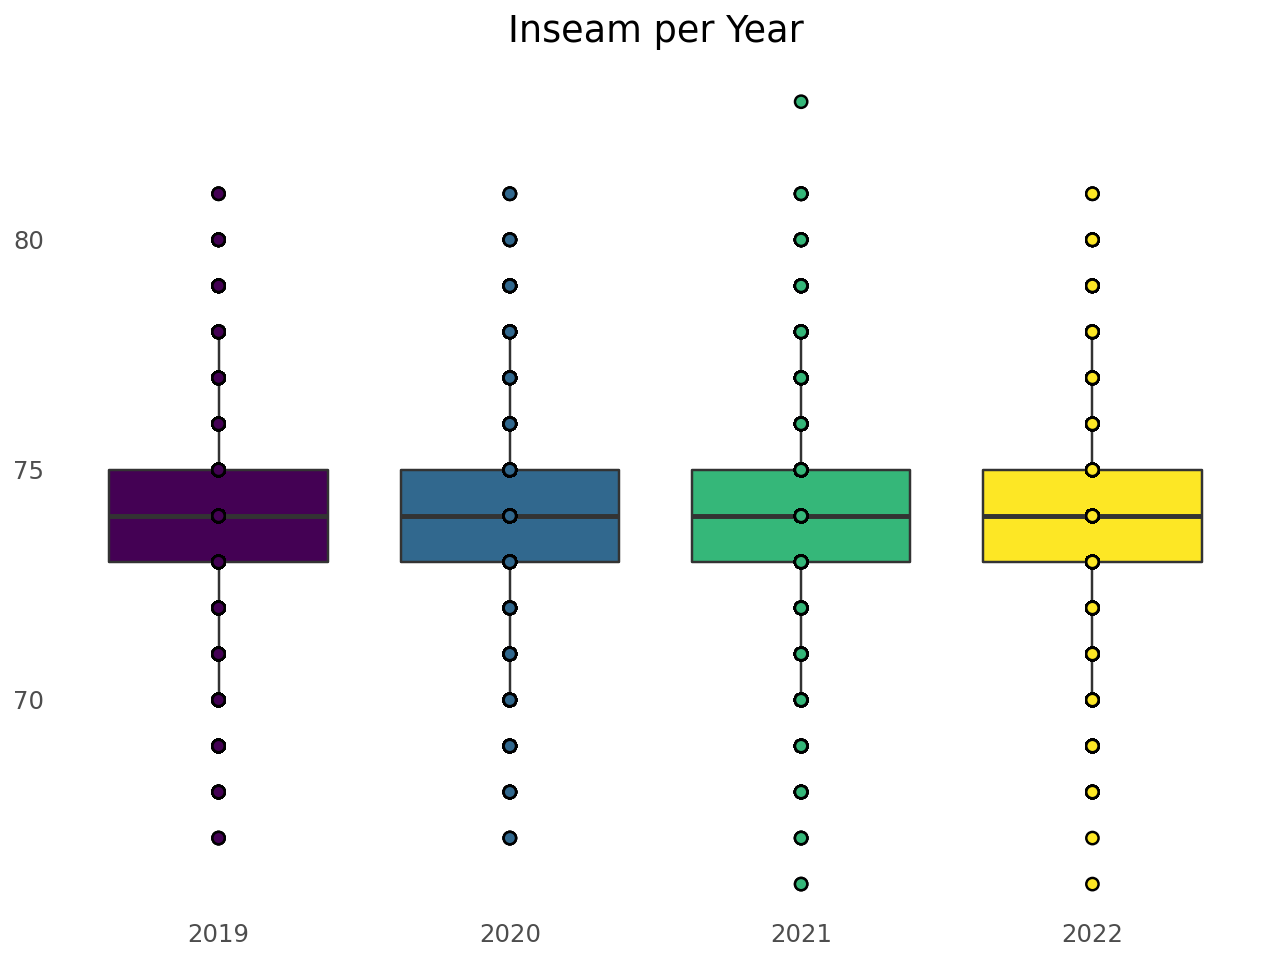

In [10]:
#inseam per year
(ggplot(boutique, aes(x = "factor(year)", y = "inseam_cm", fill = "year")) + geom_boxplot() + geom_point(size = 2)
+ theme_minimal()
+ labs(title = "Inseam per Year", x = "Year", y = "Inseam (cm)")
+ theme(panel_grid_major_x = element_blank(),
        panel_grid_major_y = element_blank(),
        panel_grid_minor_y = element_blank(),
        axis_title_x=element_blank(),
        axis_title_y=element_blank(),
        legend_position = "none"))